In [1]:
%matplotlib widget

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="3"

In [3]:
import sys
sys.path.append("../")

loading objects...
sampling point clouds...
finding broken points clouds...
Loaded 4 objects from /data/wlsgur4011/DataCollection/BreakingBad/data_split/everyday/BeerBottle/3f91158956ad7db0322747720d7d37e8/fractured_3/


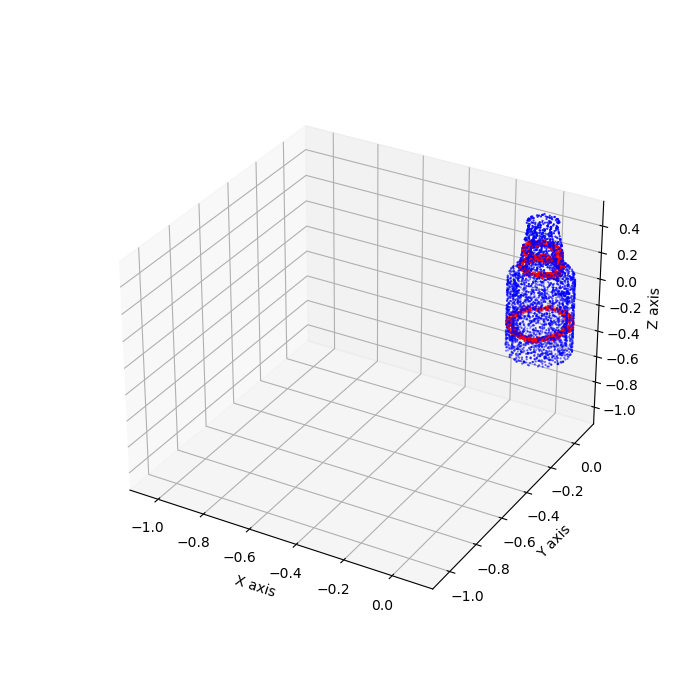

In [4]:
from util.part_object import PartObjSet, empty_obj
obj_folder = '/data/wlsgur4011/DataCollection/BreakingBad/data_split/everyday/BeerBottle/3f91158956ad7db0322747720d7d37e8/fractured_3/'
# '/data/wlsgur4011/DataCollection/BreakingBad/data_split/artifact/653931_sf/mode_16'
part_objs = PartObjSet(obj_folder, num_total_point=50000)
part_objs.show_all()

# part_objs.show((2, 5))

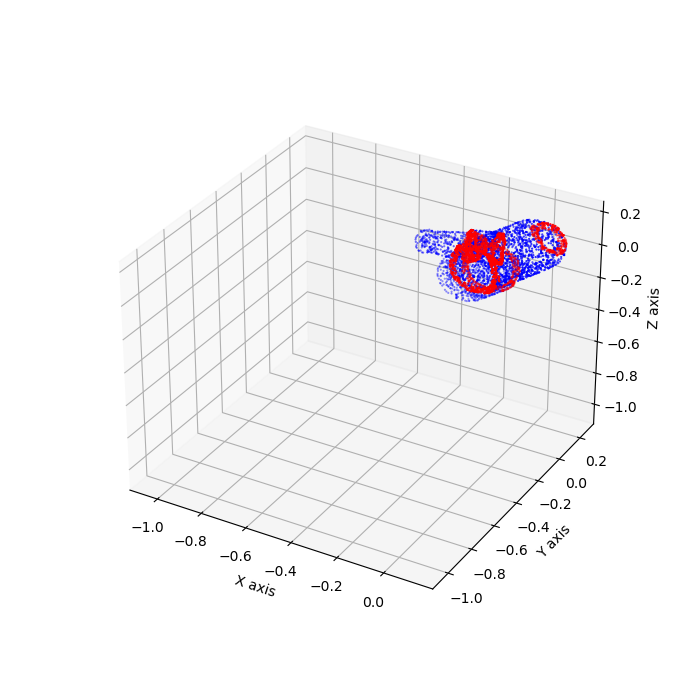

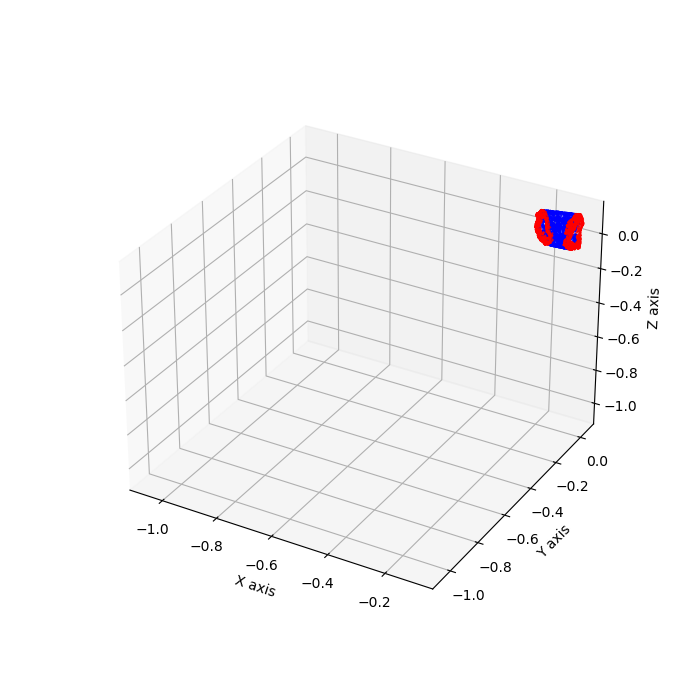

In [5]:
part_objs.random_transform()
part_objs.show_all()
src_idx = -1
dst_idx = 3
part_objs.show((src_idx, dst_idx))

# Set Source and destination

# RANSAC

In [6]:
for i in range(10):
    part_objs.ransac(src_idx, dst_idx, normal_angle=0.03, voxel_size=0.05)
    part_objs.icp(src_idx, dst_idx)
    # part_objs.fast_global_registration(src_idx, dst_idx)
    part_objs.show((src_idx, dst_idx))

:: Downsample with a voxel size 0.050.
:: Downsample with a voxel size 0.050.
:: RANSAC registration on point clouds.


/data/wlsgur4011/part_assembly/code/../util/open3d_util.py:39: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811806235/work/torch/csrc/utils/tensor_new.cpp:201.)
  target_down.normals = o3d.utility.Vector3dVector(-torch.Tensor(target_down.normals))


TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. open3d.cpu.pybind.pipelines.registration.RANSACConvergenceCriteria(arg0: open3d.cpu.pybind.pipelines.registration.RANSACConvergenceCriteria)
    2. open3d.cpu.pybind.pipelines.registration.RANSACConvergenceCriteria(max_iteration: int = 1000, max_validation: int = 1000)

Invoked with: 10000000, 0.999

In [ ]:
part_objs.union(src_idx, dst_idx)
part_objs.show_all()

In [ ]:
import open3d as o3d
tmp = o3d.pipelines.registration.CorrespondenceCheckerBasedOnNormal(1)